### Monte Carlo, Probability, and Expected Value

My difficulty in understanding probability and statistics motivated me to write this notebook. I once worked for a casino, and every time a client wins inordinate amount of money, the management panics and tasks us lowly analysts to start crunching numbers on the probability of cheating. While others start searching for formulas, I had a secret weapon: I can model any scenario using Monte Carlo simulation. Make no mistake, knowing the statistical odds helps, but for demonstration purposes, nothing beats MC. For one, probability distribution curves drawn from a formula confuses the shit out of non-mathematically inclined stakeholders. Secondly, once you know how to model an event using MC, the chances of committing an error decreases significantly versus mishandling a binomial distribution formula. 

I will demonstrate the power of MC using a simple casino game: sic-bo (to the unsophisticated slapsoils sic-bo is similar to color game in your friendly neighborhood peryahan). For starters the role of game is simple: there are three dice (or die???? Fuck me. I cannot figure out the plural of dice. All I know is dices aint it, so I'm going along with die). We roll those die and bet on the outcome. For  our sake let us focus on the six most common bets: the numbers that will come out. You can bet from one to six. The casino gives you an equal amount to your bet if your number comes up, it gives you double if there are two die with your number, and thrice the amount if all dice matches your number.

We knew the expected value from this bet:

$ EV = chances of hitting 1 dice * winnings + chances of hitting 2 die * winnings + chances of winning 3 die * winnings - chances of not hitting anything * loss $

$ chance of hitting 1 dice = (1/6) * (5/6) * (5/6) $

$ chance of hitting 2 die = (1/6) * (5/6) * (5/6) $

$ chance of hitting 3 die = (1/6) * (1/6) * (1/6) $

$ [(75/216)(1) + (15/216)(2) + (1/216)(3) + (125/216)(-1)] = -0.08 $

Therefore if you bet 1 peso, you are expected to lose 0.08 cents per bet.

With that in mind, let's code the motherfucker. 

In [43]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [44]:
def roll_dice():

    return random.randrange(1,7)

def sic_bo():

    return roll_dice(), roll_dice(), roll_dice()

def simulate_games(n_games):
    result = []

    for i in range(n_games):
        j,k,l = sic_bo()
        result.append(Counter([j,k,l]))
    
    return result

def simulate_win_loss(bet_amount, num, n_games):
    result = simulate_games(n_games)
    winnings = 0
    for i in result:
        if num in i:
            winnings += bet_amount * i[num]
        else:
            winnings -= bet_amount

    return winnings

In [45]:
simulate_win_loss(bet_amount=100, num=2, n_games=1)

-100

Let us simulate 1000 visits to the casino where in each visit you bet 100 pesos on your favorite number (2) for 100 times. 

Applying the expected value, you expect to lose 8 peso per bet, which per visit amounts to 800 pesos. The genius of gaming is, you will not always go home a loser, and those few times that you win will encourage you to come back for more. And in the extereme cases where you become a degenerate gambler, even the near wins couns as a win in your mind. (insert citation).

In [55]:
result = []
for i in range(1000):
    result.append(simulate_win_loss(100, 2, 100))

In [56]:
min(result), max(result), np.mean(result)

(-4000, 3500, -741.9)

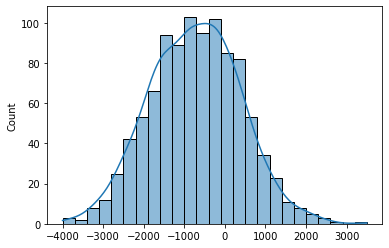

In [57]:
sns.histplot(result, kde=True)
plt.show()

In [58]:
len([x for x in result if x>0])

236

In [59]:
len([x for x in result if x<0])

727

In [60]:
len([x for x in result if x==0])

37

In [5]:
np.mean(result), max(result), min(result)

(-814.8, 2700, -3900)

The result of the MC simulation shows that your average visit yielded a loss of -823.7. However, there was a day you went home with 2900 in winnings and a day where you went home poorer by 4100 pesos. 

As demonstrated, a Python code with less than a hundred lines replicated a model of a casino game. The statistical solution is full of formula (boriiiinggggg) while the MC simulation can be visualized and easily explained with just 36 lines of code. 

The power of MC shows itself when trying multiple what ifs? What if a player also randomly varies his bet from 500 to 1000 in multiples of 100? With a few lines of code we can show that.The power of MC shows itself when trying multiple what ifs? What if a player also randomly varies his bet from 500 to 1000 in multiples of 100? With a few lines of code we can show that.

Good luck answering those questions with a stat book. I bet even a stat PhD will take at least an hour to solve it using pen and paper, and the solution will be full of signs and symbols that will scare the hell out of a casino manager. 

In [6]:
# scenario: a player randomly changes his betting from 500 to 1000 in multiples of 100. 
# modify the simulate_win_loss function.

def simulate_win_loss2(num, n_games):
    result = simulate_games(n_games)
    winnings = 0
    for i in result:
        # random betting
        bet_amount = random.randrange(5,11) * 100
        if num in i:
            winnings += bet_amount * i[num]
        else:
            winnings -= bet_amount

    return winnings

result2 = []
for i in range(1000):
    winnings = simulate_win_loss2(2, 100)
    result2.append(winnings)

In [7]:
np.mean(result2), min(result2), max(result2)

(-6094.5, -38100, 21800)

In [8]:
# scenario: a player bets 100 per game, but selects a different number each time
# modify the simulate_win_loss function.

def simulate_win_loss2(n_games, bet_amount):
    result = simulate_games(n_games)
    winnings = 0
    for i in result:
        # random betting
        num = random.randrange(1,7)
        if num in i:
            winnings += bet_amount * i[num]
        else:
            winnings -= bet_amount

    return winnings

result3 = []
for i in range(1000):
    winnings = simulate_win_loss2(100, 100)
    result3.append(winnings)

In [9]:
np.mean(result3), min(result3), max(result3)

(-770.0, -3800, 2700)

The result is still close to 800 loss per visit since each game is independent from the previous games. 

To recap, a random system can be modeled using MC even without knowing stat if all scenarios can be accounted for. In the case of our example, we turned the rules of a casino game into code. We then used the power of for loops to generate millions of samples and obtained our conclusion from it. 

In [111]:
def spin_wheel():
    
    return random.randrange(0,37)

def red_black():
    
    number = spin_wheel()

    if number == 0:       
        return None
    else: 
        if number % 2 == 0:
            return "red"
        else:
            return "black"
        
def play_roulette(bet_amount, color):
    
    value = red_black()
    
    if value == None:
        return -bet_amount
    elif color != value:
        return -bet_amount
    else:
        return bet_amount
    
def play_roulette2(bet_amount):
    
    value = red_black()
    color_dict = {1: 'red', 2: 'black'}
    color = color_dict[random.randrange(1,3)]
    
    if value == None:
        return -bet_amount
    elif color != value:
        return -bet_amount
    else:
        return bet_amount
    

def casino_visit(bet_amount, color, n_games):
    
    winnings = 0
    for i in range(n_games):
        winnings += play_roulette2(bet_amount)
        
    return winnings

100 games per visit, bet on red, amount 100

In [115]:
result = []
for i in range(1000):
    result.append(casino_visit(100, 'red', 100))
    
np.mean(result)

-332.8

In [79]:
(18/37) * 1 - (19/37) * 1

-0.027027027027026973

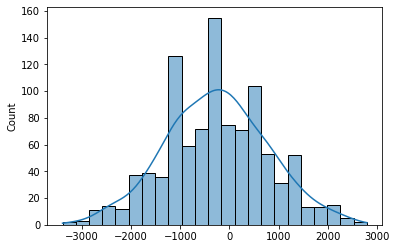

In [107]:
sns.histplot(result, kde=True)
plt.show()